## Uber Data Case study ## 

### Buisness Problem: ### 
You may have some experience of travelling to and from the airport. Have you ever used Uber or any other cab service for this travel? Did you at any time face the problem of cancellation by the driver or non-availability of cars?

Well, if these are the problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue.

### Aim of the Analysis: ###
The aim of the analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars), finding the peak time periods when these problems are happening.

In [ ]:
#Write code to load the dataset here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
df = pd.read_csv("Uber_Request_Data.csv")


In [ ]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [ ]:
print (df.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [ ]:
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

### Finding the busy hour ###

In [ ]:
#We first convert Request timestamp and Drop timestamp to datetime
df['Request timestamp']=pd.to_datetime(df['Request timestamp'])
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'])


#next we make a new column of request hour about what hour the request was made
df['Request hour']=df['Request timestamp'].apply(lambda x: x.hour)

df['Request hour'].value_counts()

18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: Request hour, dtype: int64

We note that $18^{th}$ hour has most requests



### Finding Cancelled Dates ###

In [ ]:
df['Request date']=df['Request timestamp'].apply(lambda x: x.date())
df[df['Status']=='Cancelled']['Request date'].value_counts()


2016-07-13    270
2016-11-07    262
2016-07-14    252
2016-12-07    240
2016-07-15    240
Name: Request date, dtype: int64

We note that the date 2016-07-13 has the highest number of cancelations



### Finding the rides cancled from city  ###



In [ ]:
len(df[(df['Pickup point']=='City') & (df['Status']=='Cancelled')])

1066

### Finding the rides cancled from airpot ###


In [ ]:
len(df[(df['Pickup point']=='Airport') & (df['Status']=='Cancelled')])


198

### Finding the number of rides missed due to no cars available ###

In [ ]:
len(df[(df['Status']=='No Cars Available')])


2650

Hence, most number of rides cancelled due to non availability of cars. 

### Finding peak request time ###

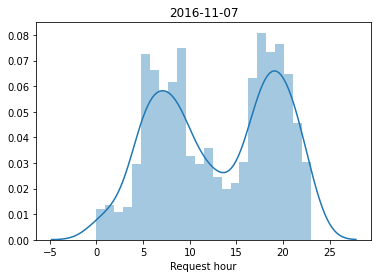

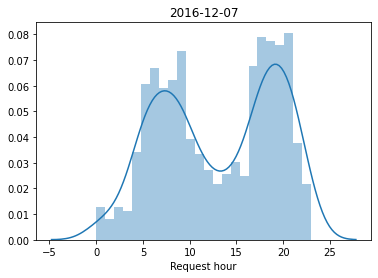

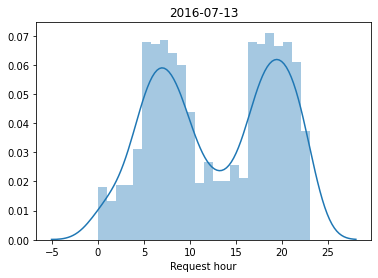

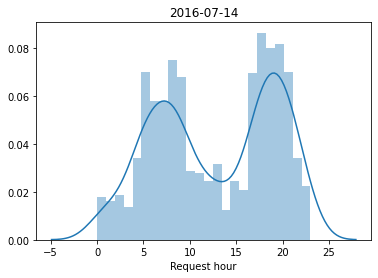

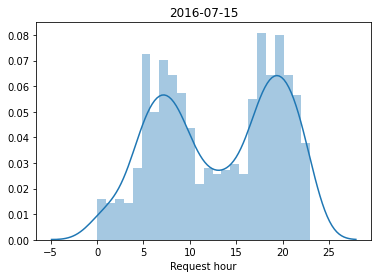

In [ ]:
unique_dates=df['Request date'].unique()
#use a for loop to plot the histogram on 'Request hour'
for i in unique_dates:
    #we will use 24 bins, one bin for each hour
    sns.distplot(df[df["Request date"]==i]['Request hour'], bins=24)
    plt.title(str(i))
    plt.show()

Hence, most number of request are obtained in morning as well as in the evening hours across all days

### Finding request time across different pick-up points ###


### 1. Pickup-point is `city`

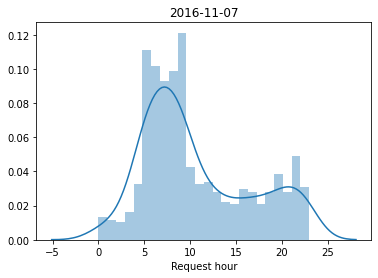

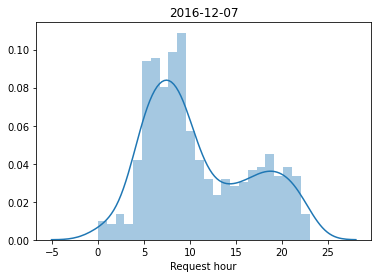

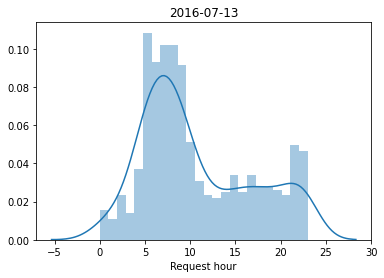

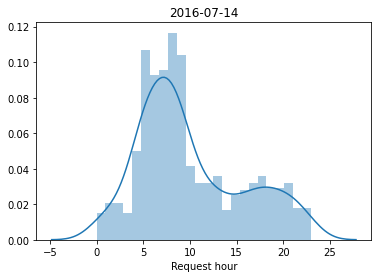

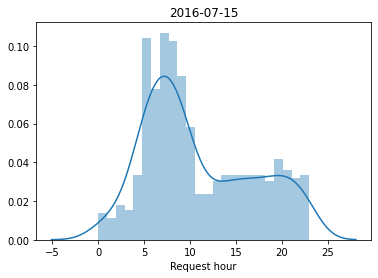

In [ ]:
for i in unique_dates:
    sns.distplot(df[(df["Request date"]==i) & (df['Pickup point']=='City')]['Request hour'], bins=24)
    plt.title(str(i))
    plt.show()


2. Pickup-point is `Airpot`

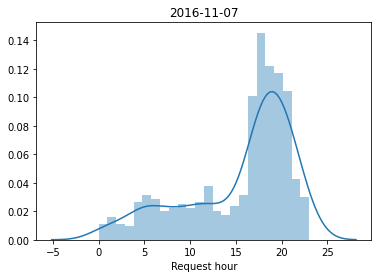

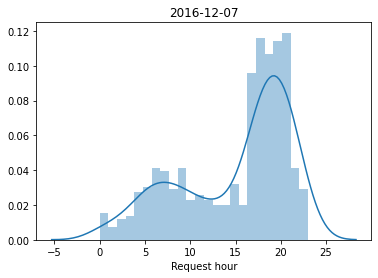

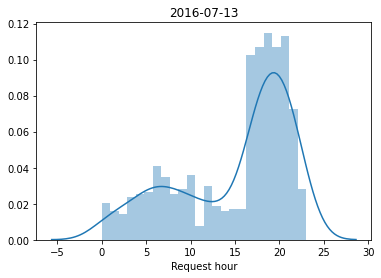

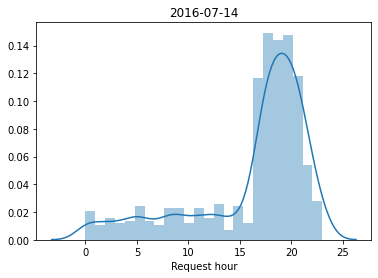

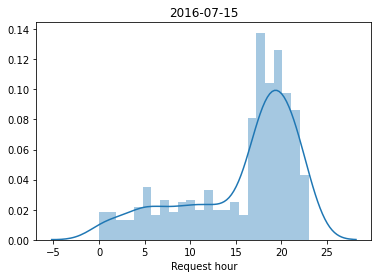

In [ ]:
for i in unique_dates:
    sns.distplot(df[(df["Request date"]==i) & (df['Pickup point']=='Airport')]['Request hour'], bins=24)
    plt.title(str(i))
    plt.show()

### Finding the number of request in morning/ Day/Evening based on the below time slot ###

Hour Range(x)	Time Slot

---


x < 5	Early morning.

5 <= x < 10	Morning.

10 <= x < 17	Day Time.

17 <= x < 22	Evening.

22 <= x	Late Night.

In [ ]:
def time_period(x):
    #divide the time of the day into five categories
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day Time"
    elif 17 <= x < 22:
        return "Evenning"
    else:
        return "Late Night"

#use this function on the request hour to create Time slot 
df['Time slot'] = df['Request hour'].apply(lambda x: time_period(x))
df['Time slot'].value_counts()


Evenning         2342
Morning          2103
Day Time         1224
Early Morning     578
Late Night        498
Name: Time slot, dtype: int64

Hence, the most numbr of request is coming in the evening between 5pm to 10pm

### Finding the status of trips in each time slot ###

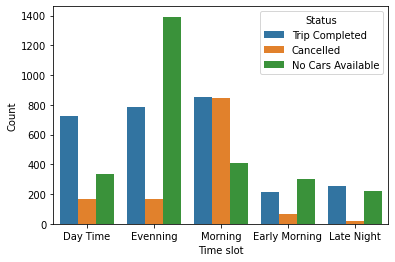

In [ ]:
df['Count']=1

#we will have to change the estimated as sum, since by default the barplot takes the mean
sns.barplot(data = df, x = 'Time slot', y='Count', hue= 'Status',estimator = np.sum)


1. In the evening there is problem of unavailability of cars.
2. In the morning most number of trips are cancelled. 